# UAS ILMU DATA II 
Anggota Kelompok:
- Calvin Phangnesia / 202000
- Daniel Wiratman / 202000205
- Filipus Dani Astono / 202000135
- Pegasus V. Surjaningtyas / 202000178
- Sean Wilbert N. D. / 202000

### Judul: Enhanced Super Resolution Generative Adversarial Network (ESRGAN)

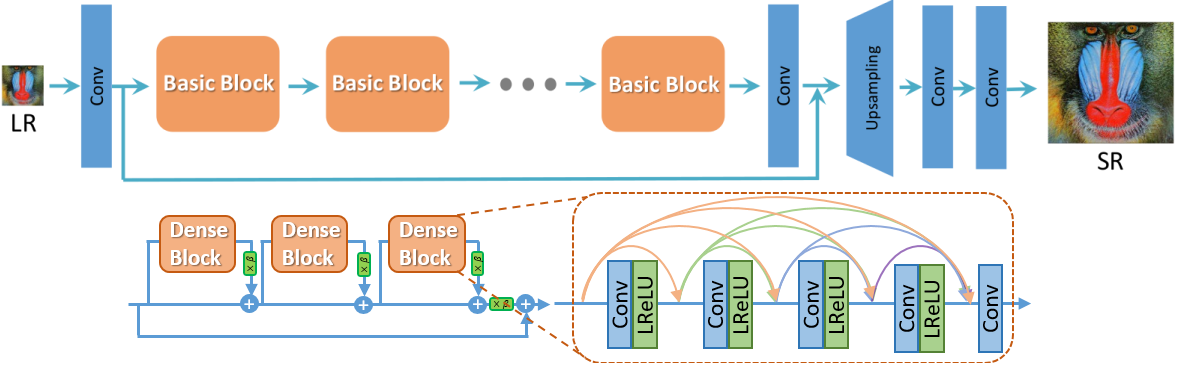

In [9]:
import torch
from model import Generator, Discriminator

print("Testing Classes...\n")

gen = Generator()
disc = Discriminator()
low_res = 24
x = torch.randn((5, 3, low_res, low_res))
gen_out = gen(x)
disc_out = disc(gen_out)

print(gen_out.shape)
print(disc_out.shape)

Testing Classes...

torch.Size([5, 3, 96, 96])
torch.Size([5, 1])


In [ ]:
import os
import cv2

def resize_images(input_folder, output_folder, target_size=(128, 128)):
    os.makedirs(output_folder, exist_ok=True)
    files = os.listdir(input_folder)

    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)
        image = cv2.imread(input_path)
        resized_image = cv2.resize(image, target_size)
        cv2.imwrite(output_path, resized_image)

input_folder = './test_images'
output_folder = './resized_images'
resize_images(input_folder, output_folder)

In [7]:
from dataset import Group4Dataset
from torch.utils.data import DataLoader

dataset = Group4Dataset(root_dir="resized_images")
loader = DataLoader(dataset, batch_size=8)

for low_res, high_res in loader:
    print(low_res.shape)
    print(high_res.shape)

resized_images\calvin1.jpg
resized_images\dani2.jpg
resized_images\sean1.jpg
resized_images\sean3.jpg
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 128, 128])


## For Training

In [1]:
from model import Generator, Discriminator, initialize_weights
from utils import save_checkpoint, load_checkpoint
from dataset import Group4Dataset
from loss import VGGLoss
from train import train_fn
import config

from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torch import optim
from torch import nn
import torch

In [6]:
dataset = Group4Dataset(root_dir="resized_images")
loader = DataLoader(
    dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=True,
    pin_memory=True,
    num_workers=config.NUM_WORKERS,
)
gen = Generator(in_channels=3).to(config.DEVICE)
disc = Discriminator(in_channels=3).to(config.DEVICE)
initialize_weights(gen)
opt_gen = optim.Adam(gen.parameters(), lr=config.LEARNING_RATE, betas=(0.0, 0.9))
opt_disc = optim.Adam(disc.parameters(), lr=config.LEARNING_RATE, betas=(0.0, 0.9))
writer = SummaryWriter("logs")
tb_step = 0
l1 = nn.L1Loss()
gen.train()
disc.train()
vgg_loss = VGGLoss()

g_scaler = torch.cuda.amp.GradScaler()
d_scaler = torch.cuda.amp.GradScaler()

# change this
config.LOAD_MODEL = False

if config.LOAD_MODEL:
    load_checkpoint(
        config.CHECKPOINT_GEN,
        gen,
        opt_gen,
        config.LEARNING_RATE,
    )
    load_checkpoint(
        config.CHECKPOINT_DISC,
        disc,
        opt_disc,
        config.LEARNING_RATE,
    )


for epoch in range(config.NUM_EPOCHS):
    tb_step = train_fn(
        loader,
        disc,
        gen,
        opt_gen,
        opt_disc,
        l1,
        vgg_loss,
        g_scaler,
        d_scaler,
        writer,
        tb_step,
    )

    if config.SAVE_MODEL:
        save_checkpoint(gen, opt_gen, filename=config.CHECKPOINT_GEN)
        save_checkpoint(disc, opt_disc, filename=config.CHECKPOINT_DISC)

C:\Users\Daniel\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Daniel\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Daniel\AppData\Roaming\Python\Python39\site-packages\torch\cuda\amp\grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Daniel\App

=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.88s/it, adversarial=2.02e-5, critic=9.99, gp=1, l1=0.00491, vgg=3.93]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.67s/it, adversarial=0.000727, critic=9.92, gp=0.998, l1=0.0049, vgg=3.34]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.39s/it, adversarial=0.00338, critic=9.48, gp=0.989, l1=0.00488, vgg=3.91]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.58s/it, adversarial=0.0093, critic=7.71, gp=0.95, l1=0.00479, vgg=3.47]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:09<00:00,  9.05s/it, adversarial=0.0254, critic=1.56, gp=0.851, l1=0.0048, vgg=3.13]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:07<00:00,  7.89s/it, adversarial=0.0508, critic=-15.9, gp=0.55, l1=0.00429, vgg=3.78]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:07<00:00,  7.96s/it, adversarial=0.16, critic=-71.2, gp=0.054, l1=0.00484, vgg=3.69]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.05s/it, adversarial=0.0955, critic=-98.1, gp=12.5, l1=0.00475, vgg=3.41]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.75s/it, adversarial=0.105, critic=-182, gp=1.99, l1=0.00473, vgg=3.85]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.59s/it, adversarial=0.105, critic=-248, gp=22.4, l1=0.00461, vgg=3.59]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.49s/it, adversarial=0.245, critic=-245, gp=11.5, l1=0.0043, vgg=3.84]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.63s/it, adversarial=0.335, critic=-279, gp=15.7, l1=0.00479, vgg=3.84]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.45s/it, adversarial=0.288, critic=-442, gp=19.3, l1=0.00467, vgg=3.56]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.53s/it, adversarial=0.733, critic=94.9, gp=118, l1=0.00441, vgg=4.09]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.50s/it, adversarial=0.346, critic=13.4, gp=0.449, l1=0.0048, vgg=3.88]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.58s/it, adversarial=0.403, critic=-295, gp=14.7, l1=0.00477, vgg=3.64]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.55s/it, adversarial=0.412, critic=-276, gp=22.1, l1=0.00473, vgg=3.87]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.49s/it, adversarial=0.469, critic=-319, gp=15.2, l1=0.00468, vgg=3.76]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.59s/it, adversarial=0.837, critic=-354, gp=14.8, l1=0.00449, vgg=3.46]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.61s/it, adversarial=0.359, critic=-222, gp=27.1, l1=0.00429, vgg=4.02]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.76s/it, adversarial=0.327, critic=-123, gp=12.5, l1=0.00302, vgg=3.61]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.73s/it, adversarial=10.3, critic=444, gp=3.25, l1=0.00868, vgg=4.11]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.72s/it, adversarial=0.833, critic=776, gp=26.9, l1=0.00408, vgg=3.6]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.65s/it, adversarial=0.693, critic=138, gp=0.538, l1=0.00419, vgg=3.54]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.76s/it, adversarial=0.583, critic=82, gp=0.0535, l1=0.00424, vgg=3.4]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.79s/it, adversarial=0.438, critic=-7.4, gp=0.0329, l1=0.00424, vgg=3.68]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.74s/it, adversarial=0.321, critic=-105, gp=0.189, l1=0.00422, vgg=3.71]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.85s/it, adversarial=0.245, critic=-163, gp=1.16, l1=0.00419, vgg=3.5]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:09<00:00,  9.59s/it, adversarial=0.198, critic=-200, gp=4.41, l1=0.00415, vgg=3.72]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:09<00:00,  9.24s/it, adversarial=0.276, critic=-220, gp=7.47, l1=0.00412, vgg=3.3]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.45s/it, adversarial=0.228, critic=-222, gp=8.19, l1=0.00402, vgg=3.66]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:07<00:00,  7.93s/it, adversarial=0.255, critic=-226, gp=11, l1=0.00393, vgg=3.08]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:07<00:00,  7.83s/it, adversarial=0.134, critic=-215, gp=10.5, l1=0.00374, vgg=3.48]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.92s/it, adversarial=0.146, critic=-191, gp=13.4, l1=0.00351, vgg=3.9]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:09<00:00,  9.08s/it, adversarial=-.0523, critic=-154, gp=8.98, l1=0.00321, vgg=3.23]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.95s/it, adversarial=-.141, critic=-98.1, gp=9.26, l1=0.00275, vgg=3.77]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.51s/it, adversarial=-.098, critic=12.2, gp=5.4, l1=0.00193, vgg=3.52]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.52s/it, adversarial=0.832, critic=75, gp=1.04, l1=0.00283, vgg=4.15]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.87s/it, adversarial=1.81, critic=4.25, gp=0.00132, l1=0.00265, vgg=3.63]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1/1 [00:08<00:00,  8.75s/it, adversarial=0.702, critic=52.2, gp=0.538, l1=0.00218, vgg=4.03]


=> Saving checkpoint
=> Saving checkpoint


  0%|          | 0/1 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [2]:
from utils import plot_examples

gen = Generator(in_channels=3).to(config.DEVICE)
opt_gen = optim.Adam(gen.parameters(), lr=config.LEARNING_RATE, betas=(0.0, 0.9))
load_checkpoint(
    config.CHECKPOINT_GEN,
    gen,
    opt_gen,
    config.LEARNING_RATE,
)
plot_examples("resized_images/", gen)

=> Loading checkpoint
